In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [36]:
eng_cycle_col=['engine', 'cycle']
setting_col=['setting1', 'setting2', 'setting3']
sensor_col = ['sensor1',
       'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7',
       'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
       'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
       'sensor20', 'sensor21' ]
columns=eng_cycle_col+setting_col+sensor_col

#Then we will be importing our necessary Data
#NB: I will only work on the FD001 DataSet
train_data=pd.read_csv("cmaps/train_FD001.txt",sep='\s+',names=columns)
test_data=pd.read_csv("cmaps/test_FD001.txt",sep='\s+',names=columns)
true_rul=pd.read_csv("cmaps/RUL_FD001.txt",sep='\s+',names=['RUL'])

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1450/2697792131.py:12: SyntaxWarning: invalid escape sequence '\s'
  train_data=pd.read_csv("cmaps/train_FD001.txt",sep='\s+',names=columns)
/tmp/ipykernel_1450/2697792131.py:13: SyntaxWarning: invalid escape sequence '\s'
  test_data=pd.read_csv("cmaps/test_FD001.txt",sep='\s+',names=columns)
/tmp/ipykernel_1450/2697792131.py:14: SyntaxWarning: invalid escape sequence '\s'
  true_rul=pd.read_csv("cmaps/RUL_FD001.txt",sep='\s+',names=['RUL'])


In [37]:
train_data.isna().sum()

engine      0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64

In [38]:

groups = {engine: group for engine, group in train_data.groupby('engine')}


In [39]:
groups[1].describe()

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,192.0,192.000000,192.000000,192.000000,192.0,192.00,192.000000,192.000000,192.000000,1.920000e+02,1.920000e+02,192.000000,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,1.920000e+02,192.000000,192.0,192.0,192.000000,192.000000
mean,1.0,96.500000,-0.000189,0.000048,100.0,518.67,642.621042,1589.485521,1407.262135,1.462000e+01,2.161000e+01,553.439427,2388.110260,9048.265833,1.300000e+00,47.514063,521.459427,2388.110833,8128.913542,8.436555,3.000000e-02,392.854167,2388.0,100.0,38.840052,23.306310
std,0.0,55.569776,0.001953,0.000282,0.0,0.00,0.486795,5.759776,8.565610,3.562002e-15,3.562002e-15,0.910414,0.070914,4.911853,2.226251e-16,0.268346,0.749176,0.076960,5.563129,0.034125,1.043555e-17,1.475661,0.0,0.0,0.166998,0.105101
min,1.0,1.000000,-0.006700,-0.000400,100.0,518.67,641.710000,1577.600000,1393.580000,1.462000e+01,2.161000e+01,550.700000,2388.000000,9033.220000,1.300000e+00,47.030000,519.530000,2387.970000,8110.930000,8.368200,3.000000e-02,390.000000,2388.0,100.0,38.340000,22.958800
25%,1.0,48.750000,-0.001425,-0.000200,100.0,518.67,642.272500,1584.727500,1400.985000,1.462000e+01,2.161000e+01,552.830000,2388.060000,9045.297500,1.300000e+00,47.317500,521.052500,2388.050000,8125.917500,8.413275,3.000000e-02,392.000000,2388.0,100.0,38.750000,23.251525
50%,1.0,96.500000,0.000000,0.000100,100.0,518.67,642.540000,1589.615000,1404.480000,1.462000e+01,2.161000e+01,553.695000,2388.095000,9048.480000,1.300000e+00,47.450000,521.600000,2388.090000,8129.970000,8.431150,3.000000e-02,393.000000,2388.0,100.0,38.865000,23.318700
75%,1.0,144.250000,0.001000,0.000300,100.0,518.67,642.882500,1592.715000,1412.305000,1.462000e+01,2.161000e+01,554.082500,2388.140000,9051.007500,1.300000e+00,47.630000,521.960000,2388.160000,8132.752500,8.457275,3.000000e-02,394.000000,2388.0,100.0,38.960000,23.376075
max,1.0,192.000000,0.004700,0.000500,100.0,518.67,644.210000,1605.440000,1432.520000,1.462000e+01,2.161000e+01,554.960000,2388.320000,9061.210000,1.300000e+00,48.330000,522.860000,2388.350000,8140.580000,8.522700,3.000000e-02,398.000000,2388.0,100.0,39.180000,23.499900


In [40]:
groups[2].describe()

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,287.0,287.000000,287.000000,287.000000,287.0,287.00,287.000000,287.000000,287.000000,287.00,287.000000,287.000000,287.000000,287.000000,287.0,287.000000,287.000000,287.000000,287.000000,287.000000,287.00,287.00000,287.0,287.0,287.000000,287.000000
mean,2.0,144.000000,0.000051,0.000088,100.0,518.67,642.435226,1588.181986,1404.265854,14.62,21.609338,553.853484,2388.057213,9062.652439,1.3,47.389512,521.811603,2388.053554,8143.246167,8.423983,0.03,392.38676,2388.0,100.0,38.901150,23.338997
std,0.0,82.993976,0.002320,0.000298,0.0,0.00,0.560214,6.596730,9.737248,0.00,0.002491,0.940728,0.063001,12.491827,0.0,0.293672,0.799368,0.063861,8.683012,0.041128,0.00,1.64728,0.0,0.0,0.199332,0.114796
min,2.0,1.000000,-0.006800,-0.000400,100.0,518.67,641.270000,1575.380000,1387.160000,14.62,21.600000,550.850000,2387.940000,9044.620000,1.3,46.930000,519.480000,2387.920000,8129.680000,8.342800,0.03,389.00000,2388.0,100.0,38.230000,22.972100
25%,2.0,72.500000,-0.001400,-0.000200,100.0,518.67,642.025000,1583.950000,1397.450000,14.62,21.610000,553.335000,2388.010000,9054.220000,1.3,47.190000,521.460000,2388.000000,8137.065000,8.395850,0.03,391.00000,2388.0,100.0,38.805000,23.274750
50%,2.0,144.000000,0.000000,0.000100,100.0,518.67,642.360000,1587.040000,1402.110000,14.62,21.610000,554.100000,2388.040000,9058.300000,1.3,47.300000,522.040000,2388.050000,8140.610000,8.413100,0.03,392.00000,2388.0,100.0,38.930000,23.359200
75%,2.0,215.500000,0.001400,0.000400,100.0,518.67,642.800000,1592.260000,1409.005000,14.62,21.610000,554.525000,2388.090000,9068.925000,1.3,47.520000,522.340000,2388.090000,8146.925000,8.444650,0.03,393.00000,2388.0,100.0,39.050000,23.420650
max,2.0,287.000000,0.007600,0.000600,100.0,518.67,643.940000,1610.100000,1431.170000,14.62,21.610000,555.450000,2388.240000,9109.360000,1.3,48.270000,523.260000,2388.260000,8175.570000,8.537700,0.03,398.00000,2388.0,100.0,39.240000,23.600500


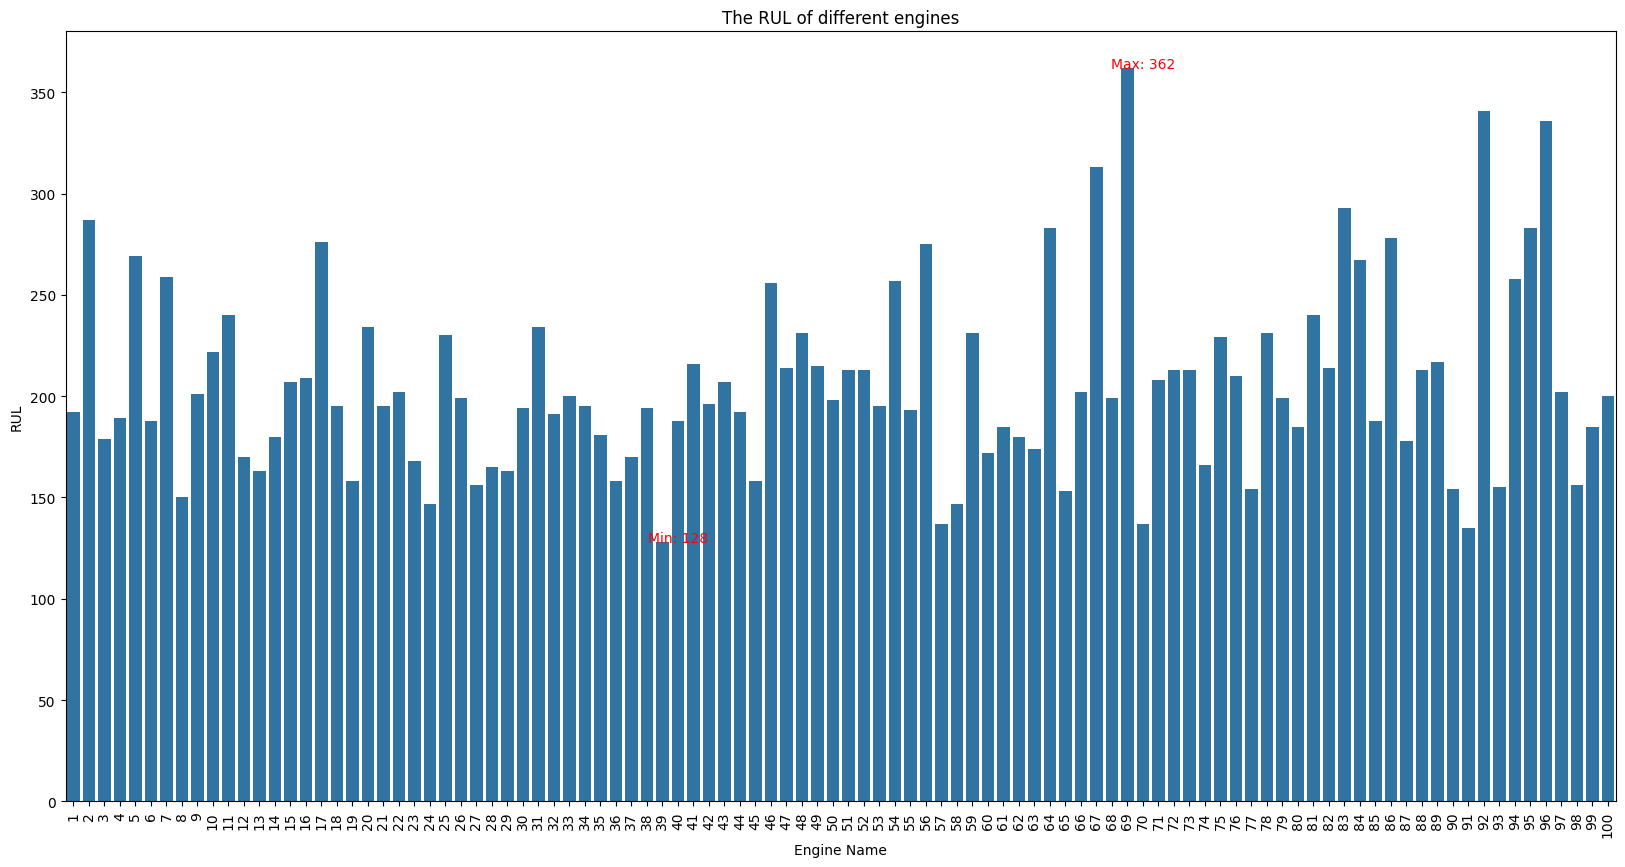

In [41]:
x=[]
y=[]
for i in range(1,101):
    x.append(i)
    y.append(len(groups[i]))
min_value = min(y)
max_value = max(y)
min_index = y.index(min_value)
max_index = y.index(max_value)



plt.figure(figsize=(20,10))
# Annotate the min and max points
plt.text(x[min_index], min_value , f"Min: {min_value}", ha='center', color='red')
plt.text(x[max_index], max_value, f"Max: {max_value}", ha='center', color='red')
plt.title("The RUL of different engines")
plt.xlabel("Engine Name")
plt.ylabel("RUL")
plt.xticks(rotation=90)
sns.barplot(x=x,y=y)    
plt.show()

### RLA understanding
##### Engine 39 have the min value of 128
##### Engine 69 have the max value of 362


In [42]:
for i in range(1,101):
    groups[i]["RUL"]=len(groups[i])-groups[i]['cycle']

In [43]:
groups[20]

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
3934,20,1,0.0023,0.0002,100.0,518.67,643.00,1589.87,1404.30,14.62,21.61,553.44,2388.10,9063.70,1.3,47.56,521.93,2388.02,8136.61,8.4498,0.03,391,2388,100.0,38.88,23.2767,233
3935,20,2,0.0002,0.0000,100.0,518.67,642.72,1588.75,1406.60,14.62,21.61,553.77,2388.13,9055.40,1.3,47.67,520.66,2388.06,8136.47,8.4217,0.03,393,2388,100.0,38.79,23.2626,232
3936,20,3,-0.0010,-0.0001,100.0,518.67,642.90,1587.31,1404.30,14.62,21.61,552.91,2388.05,9055.83,1.3,47.49,521.14,2388.07,8136.89,8.4432,0.03,391,2388,100.0,38.79,23.2760,231
3937,20,4,0.0013,-0.0000,100.0,518.67,642.42,1583.00,1417.06,14.62,21.61,553.69,2388.04,9057.87,1.3,47.61,521.63,2388.09,8133.40,8.4390,0.03,393,2388,100.0,38.87,23.2784,230
3938,20,5,-0.0009,-0.0003,100.0,518.67,642.55,1585.71,1406.90,14.62,21.61,553.06,2388.06,9054.13,1.3,47.55,521.48,2388.09,8135.61,8.4171,0.03,392,2388,100.0,38.88,23.2748,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,20,230,-0.0010,-0.0000,100.0,518.67,643.57,1605.67,1431.45,14.62,21.61,552.20,2388.24,9072.49,1.3,48.16,520.12,2388.24,8144.08,8.4887,0.03,396,2388,100.0,38.60,23.1231,4
4164,20,231,0.0022,-0.0003,100.0,518.67,643.89,1603.35,1429.72,14.62,21.61,550.84,2388.22,9075.48,1.3,48.41,519.74,2388.22,8146.48,8.4800,0.03,397,2388,100.0,38.74,22.9885,3
4165,20,232,-0.0003,0.0000,100.0,518.67,643.85,1608.02,1432.08,14.62,21.61,551.34,2388.27,9075.69,1.3,48.17,519.28,2388.29,8139.51,8.5230,0.03,397,2388,100.0,38.33,23.1460,2
4166,20,233,-0.0012,-0.0001,100.0,518.67,643.93,1601.90,1437.23,14.62,21.61,551.67,2388.26,9077.16,1.3,48.23,519.97,2388.23,8143.94,8.5058,0.03,396,2388,100.0,38.46,22.9783,1


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
def Scaler(group):
    sensor_data=group[sensor_col]
    scaled_sensor_data=scaler.fit_transform(sensor_data)
    scaled_data=pd.DataFrame(scaled_sensor_data,columns=sensor_col)
    droped=group.drop(sensor_col,axis=1).reset_index()
    group=pd.concat([droped,scaled_data],axis=1)
    return group




for i in range(1,101):
    groups[i]=Scaler(groups[i])
    


In [45]:
groups[20]

,index,engine,cycle,setting1,setting2,setting3,RUL,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,3934,20,1,0.0023,0.0002,100.0,233,0.0,0.510917,0.365163,0.165695,0.0,0.0,0.711584,0.259259,0.520000,0.0,0.247788,0.963636,0.000000,0.350607,0.378748,0.0,0.142857,0.0,0.0,0.734177,0.666071
1,3935,20,2,0.0002,0.0000,100.0,232,0.0,0.388646,0.325988,0.223968,0.0,0.0,0.789598,0.370370,0.245620,0.0,0.345133,0.501818,0.148148,0.344071,0.195567,0.0,0.428571,0.0,0.0,0.620253,0.634598
2,3936,20,3,-0.0010,-0.0001,100.0,231,0.0,0.467249,0.275621,0.165695,0.0,0.0,0.586288,0.074074,0.259835,0.0,0.185841,0.676364,0.185185,0.363679,0.335724,0.0,0.142857,0.0,0.0,0.620253,0.664509
3,3937,20,4,0.0013,-0.0000,100.0,230,0.0,0.257642,0.124869,0.488979,0.0,0.0,0.770686,0.037037,0.327273,0.0,0.292035,0.854545,0.259259,0.200747,0.308344,0.0,0.428571,0.0,0.0,0.721519,0.669866
4,3938,20,5,-0.0009,-0.0003,100.0,229,0.0,0.314410,0.219657,0.231568,0.0,0.0,0.621749,0.111111,0.203636,0.0,0.238938,0.800000,0.259259,0.303922,0.165580,0.0,0.285714,0.0,0.0,0.734177,0.661830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,4163,20,230,-0.0010,-0.0000,100.0,4,0.0,0.759825,0.917803,0.853560,0.0,0.0,0.418440,0.777778,0.810579,0.0,0.778761,0.305455,0.814815,0.699346,0.632334,0.0,0.857143,0.0,0.0,0.379747,0.323214
230,4164,20,231,0.0022,-0.0003,100.0,3,0.0,0.899563,0.836656,0.809729,0.0,0.0,0.096927,0.703704,0.909421,0.0,1.000000,0.167273,0.740741,0.811391,0.575619,0.0,1.000000,0.0,0.0,0.556962,0.022768
231,4165,20,232,-0.0003,0.0000,100.0,2,0.0,0.882096,1.000000,0.869521,0.0,0.0,0.215130,0.888889,0.916364,0.0,0.787611,0.000000,1.000000,0.485994,0.855932,0.0,1.000000,0.0,0.0,0.037975,0.374330
232,4166,20,233,-0.0012,-0.0001,100.0,1,0.0,0.917031,0.785939,1.000000,0.0,0.0,0.293144,0.851852,0.964959,0.0,0.840708,0.250909,0.777778,0.692810,0.743807,0.0,0.857143,0.0,0.0,0.202532,0.000000


In [46]:
train_data=pd.concat(groups.values(),axis=0).reset_index()

In [47]:
train_data

,level_0,index,engine,cycle,setting1,setting2,setting3,RUL,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,0,0,1,1,-0.0007,-0.0004,100.0,191,0.0,0.044000,0.434626,0.180277,0.0,0.0,0.859155,0.187500,0.463380,0.0,0.338462,0.639640,0.131579,0.933895,0.332039,0.0,0.250,0.0,0.0,0.857143,0.850490
1,1,1,1,2,0.0019,-0.0003,100.0,190,0.0,0.176000,0.510776,0.245506,0.0,0.0,0.715962,0.125000,0.387638,0.0,0.353846,0.825826,0.263158,0.693423,0.411650,0.0,0.250,0.0,0.0,0.785714,0.858991
2,2,2,1,3,-0.0043,0.0003,100.0,189,0.0,0.256000,0.373204,0.272727,0.0,0.0,0.835681,0.250000,0.704537,0.0,0.184615,0.867868,0.157895,0.752108,0.321036,0.0,0.000,0.0,0.0,0.726190,0.712253
3,3,3,1,4,0.0007,0.0000,100.0,188,0.0,0.256000,0.186422,0.212892,0.0,0.0,0.880282,0.343750,0.580922,0.0,0.076923,1.000000,0.289474,0.772344,0.000000,0.0,0.250,0.0,0.0,0.642857,0.767141
4,4,4,1,5,-0.0019,-0.0002,100.0,187,0.0,0.264000,0.188578,0.324602,0.0,0.0,0.774648,0.187500,0.783494,0.0,0.192308,0.798799,0.184211,0.771332,0.396117,0.0,0.375,0.0,0.0,0.666667,0.823508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,195,20626,100,196,-0.0004,-0.0003,100.0,4,0.0,0.800000,0.590143,0.868281,0.0,1.0,0.187032,0.655172,0.635007,0.0,0.748031,0.063333,0.935484,0.187578,0.654309,0.0,0.875,0.0,0.0,0.336538,0.062636
20627,196,20627,100,197,-0.0016,-0.0005,100.0,3,0.0,0.821739,0.797456,1.000000,0.0,1.0,0.044888,0.793103,0.621099,0.0,0.724409,0.126667,0.806452,0.119255,0.745992,0.0,0.625,0.0,0.0,0.153846,0.352290
20628,197,20628,100,198,0.0004,0.0000,100.0,2,0.0,0.769565,0.732591,0.856307,0.0,1.0,0.064838,0.827586,0.647897,0.0,0.763780,0.236667,0.870968,0.401863,1.000000,0.0,1.000,0.0,0.0,0.288462,0.000000
20629,198,20629,100,199,-0.0011,0.0003,100.0,1,0.0,0.686957,0.821622,0.812400,0.0,1.0,0.000000,0.862069,0.913161,0.0,1.000000,0.123333,0.838710,0.292547,0.871242,0.0,0.625,0.0,0.0,0.144231,0.203646


In [48]:
train_data.columns[(train_data==0 ).all()]

Index(['sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19'], dtype='object')

In [49]:
train_data.drop(['sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19','level_0','index'],axis=1,inplace=True)

In [50]:
train_data

,engine,cycle,setting1,setting2,setting3,RUL,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,191,0.044000,0.434626,0.180277,0.0,0.859155,0.187500,0.463380,0.338462,0.639640,0.131579,0.933895,0.332039,0.250,0.857143,0.850490
1,1,2,0.0019,-0.0003,100.0,190,0.176000,0.510776,0.245506,0.0,0.715962,0.125000,0.387638,0.353846,0.825826,0.263158,0.693423,0.411650,0.250,0.785714,0.858991
2,1,3,-0.0043,0.0003,100.0,189,0.256000,0.373204,0.272727,0.0,0.835681,0.250000,0.704537,0.184615,0.867868,0.157895,0.752108,0.321036,0.000,0.726190,0.712253
3,1,4,0.0007,0.0000,100.0,188,0.256000,0.186422,0.212892,0.0,0.880282,0.343750,0.580922,0.076923,1.000000,0.289474,0.772344,0.000000,0.250,0.642857,0.767141
4,1,5,-0.0019,-0.0002,100.0,187,0.264000,0.188578,0.324602,0.0,0.774648,0.187500,0.783494,0.192308,0.798799,0.184211,0.771332,0.396117,0.375,0.666667,0.823508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,4,0.800000,0.590143,0.868281,1.0,0.187032,0.655172,0.635007,0.748031,0.063333,0.935484,0.187578,0.654309,0.875,0.336538,0.062636
20627,100,197,-0.0016,-0.0005,100.0,3,0.821739,0.797456,1.000000,1.0,0.044888,0.793103,0.621099,0.724409,0.126667,0.806452,0.119255,0.745992,0.625,0.153846,0.352290
20628,100,198,0.0004,0.0000,100.0,2,0.769565,0.732591,0.856307,1.0,0.064838,0.827586,0.647897,0.763780,0.236667,0.870968,0.401863,1.000000,1.000,0.288462,0.000000
20629,100,199,-0.0011,0.0003,100.0,1,0.686957,0.821622,0.812400,1.0,0.000000,0.862069,0.913161,1.000000,0.123333,0.838710,0.292547,0.871242,0.625,0.144231,0.203646


In [51]:
train_data['sensor6'].value_counts()

sensor6
1.0    13033
0.0     7598
Name: count, dtype: int64